In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [2]:
classifier = Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2)) 
classifier.add(Conv2D(32,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2))
classifier.add(Flatten())
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))
adam = Adam(lr=0.001)
classifier.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


train_set = train_datagen.flow_from_directory(r'H:\Data Science_Intellipaat.com\Python Class\Intellipaat - Artificial Intelligence\dataset\training_set',
                                             target_size=(64,64),
                                             batch_size=32,
                                             class_mode='binary')

test_set1 = test_datagen.flow_from_directory(r'H:\Data Science_Intellipaat.com\Python Class\Intellipaat - Artificial Intelligence\dataset\test_set',
                                            target_size=(64,64),
                                            batch_size=32,
                                            class_mode='binary',
                                            shuffle=False)


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [4]:
type(test_set1)

keras_preprocessing.image.directory_iterator.DirectoryIterator

In [5]:
classifier.fit_generator(train_set, 
                        epochs = 2
                        )


Epoch 1/2
250/250 [==============================] - 59s 237ms/step - loss: 0.6613 - accuracy: 0.5922
Epoch 2/2
250/250 [==============================] - 60s 238ms/step - loss: 0.6030 - accuracy: 0.6812


In [7]:
weights = classifier.layers[2].get_weights()[0]
biases = classifier.layers[0].get_weights()[1]
weights

array([[[[-4.56862971e-02, -2.94872168e-02, -1.43147698e-02, ...,
           6.16170131e-02, -2.96587055e-03, -3.67335901e-02],
         [-4.18913178e-02, -5.12340851e-02, -5.17975204e-02, ...,
          -2.07976485e-03, -5.05597070e-02,  6.34834096e-02],
         [-2.20956933e-02, -1.69825796e-02, -7.02002645e-02, ...,
           4.58358973e-03,  3.51765752e-02, -7.37986388e-03],
         ...,
         [ 3.18576284e-02, -2.96917302e-03, -2.14861017e-02, ...,
          -7.79789016e-02,  4.65348251e-02, -8.71909708e-02],
         [-8.31566900e-02, -3.43454480e-02, -5.41940704e-02, ...,
           7.42291287e-02, -2.52643730e-02, -2.27820743e-02],
         [-3.31342705e-02, -6.08550804e-03,  8.63499846e-03, ...,
           1.14480205e-01, -2.87703741e-02, -8.05749223e-02]],

        [[ 6.12256024e-03,  2.32107509e-02,  3.29922028e-02, ...,
          -8.02617818e-02,  2.45771371e-02, -7.97836185e-02],
         [-2.50429269e-02, -9.16849729e-03, -1.46459579e-01, ...,
           2.74038650e

In [9]:
classifier.save(r'H:\Data Science_Intellipaat.com\Python Class\Intellipaat - Artificial Intelligence\dataset\catdogmodel.h5')

In [10]:
from tensorflow.keras.models import load_model
model = load_model(r'H:\Data Science_Intellipaat.com\Python Class\Intellipaat - Artificial Intelligence\dataset\catdogmodel.h5')

In [14]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img("H:\Data Science_Intellipaat.com\Python Class\Intellipaat - Artificial Intelligence\dataset\single_prediction\cat_or_dog_1.jpg", 
                      target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
print(img.shape)
prediction = classifier.predict(img)

(1, 64, 64, 3)


In [15]:
prediction

array([[0.9846613]], dtype=float32)

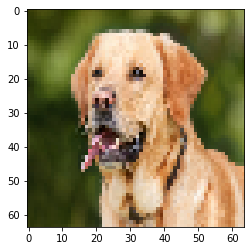

In [11]:
plt.imshow(img1)
plt.show()

In [16]:
img2 = image.load_img("H:\Data Science_Intellipaat.com\Python Class\Intellipaat - Artificial Intelligence\dataset\single_prediction\cat_or_dog_2.jpg", target_size=(64, 64))
img3 = image.img_to_array(img2)
img3 = img3/255
# create a batch of size 1 [N,H,W,C]
img3 = np.expand_dims(img3, axis=0)
prediction1 = classifier.predict(img3)

In [17]:
prediction1

array([[0.6324089]], dtype=float32)

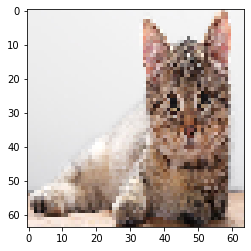

In [18]:
plt.imshow(img2)
plt.show()

In [19]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

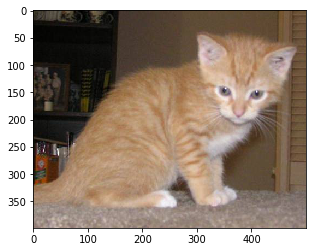

In [21]:

#Input Image for Layer visualization
img7 = image.load_img(r"H:\Data Science_Intellipaat.com\Python Class\Intellipaat - Artificial Intelligence\dataset\test_set\cats\cat.4003.jpg")
plt.imshow(img7);
#preprocess image
img8 = image.load_img(r"H:\Data Science_Intellipaat.com\Python Class\Intellipaat - Artificial Intelligence\dataset\test_set\cats\cat.4003.jpg", 
                      target_size=(64, 64))
img8 = image.img_to_array(img8)
img8 = img8/255
img8 = np.expand_dims(img8, axis=0)

In [22]:
model_layers = [ layer.name for layer in classifier.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'flatten', 'dense', 'dense_1']


In [23]:

from tensorflow.keras.models import Model
conv2d_output = Model(inputs=classifier.input, outputs=classifier.get_layer('conv2d').output)
conv2d_1_output = Model(inputs=classifier.input,outputs=classifier.get_layer('max_pooling2d').output)

In [24]:
conv2d_features = conv2d_output.predict(img)
conv2d_1_features = conv2d_1_output.predict(img)
print('First conv layer feature output shape : ',conv2d_features.shape)
print('First conv layer feature output shape : ',conv2d_1_features.shape)

First conv layer feature output shape :  (1, 62, 62, 32)
First conv layer feature output shape :  (1, 31, 31, 32)


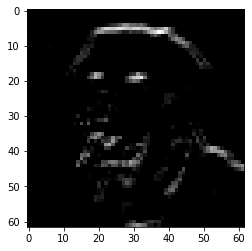

In [25]:
plt.imshow(conv2d_features[0, :, :, 8], cmap='gray')

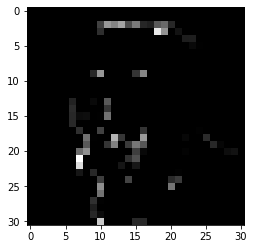

In [40]:
plt.imshow(conv2d_1_features[0, :, :, 4], cmap='gray')

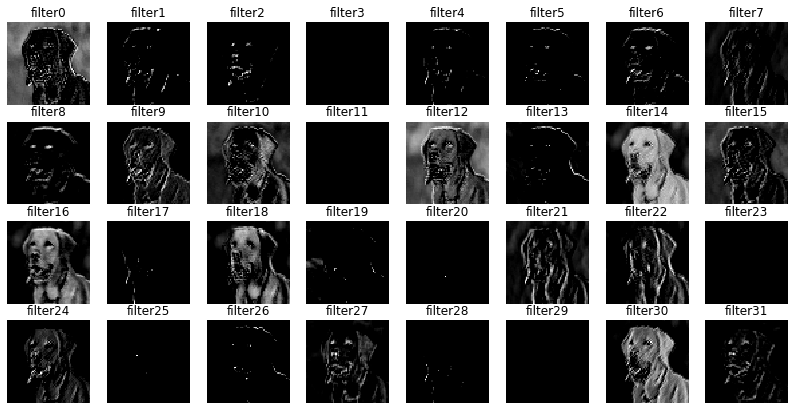

In [27]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_features[0, :, :, i], cmap='gray')
plt.show()

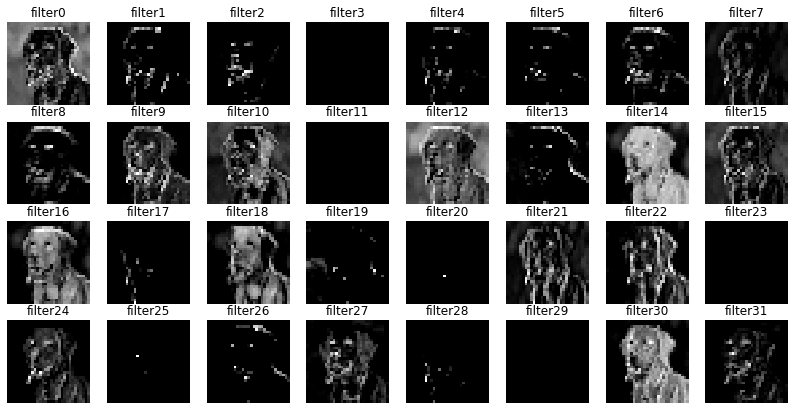

In [28]:
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='gray')
plt.show()

In [29]:
x1 = classifier.evaluate_generator(train_set)


In [30]:
x1

[0.5876289176940918, 0.677]

In [31]:
x2 = classifier.evaluate_generator(test_set1)

In [32]:
x2

[0.6489175085037474, 0.632]

In [33]:
weights = model.layers[0].get_weights()[0]
biases = model.layers[0].get_weights()[1]